<a href="https://colab.research.google.com/github/ravichas/bifx-546/blob/main/Notebooks/Chapter15_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==== Course setup: safe clone + cd + import path ====
import os
import sys

REPO_URL = "https://github.com/joelgrus/data-science-from-scratch.git"
REPO_DIR = "data-science-from-scratch"

# 1. If we're *anywhere inside* the repo, move to the parent directory first
cwd = os.getcwd()
if REPO_DIR in cwd.split(os.sep):
    parts = cwd.split(os.sep)
    # Walk up until we are at .../data-science-from-scratch
    while parts and parts[-1] != REPO_DIR:
        parts.pop()
    # Now go to the directory *above* the repo
    parent_dir = os.sep.join(parts[:-1]) or "/"
    os.chdir(parent_dir)
    print(f"Moved to parent directory: {os.getcwd()}")

# 2. Clone only if needed
if not os.path.exists(REPO_DIR):
    print("Cloning repo...")
    !git clone {REPO_URL}
else:
    print(f"{REPO_DIR} already exists — skipping clone.")

# 3. cd into the repo (this is where you'll live most of the time)
%cd {REPO_DIR}

# 4. Ensure the repo is importable (for scratch.linear_algebra, etc.)
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
    print("Added repo to sys.path")

data-science-from-scratch already exists — skipping clone.
/content/data-science-from-scratch
Added repo to sys.path


# Multiple Linear Regression


We looked at cases where inputs are just one variable. In reality, each input will be more than one number, rather a vector of $k$ numbers. For example

$$ y_i = \alpha + \beta_1 x_{i1} + \dots + \beta_{k}x_{ik} + \epsilon_i $$

and

$$ \beta = [ \alpha, \beta_{1}, \dots, \beta_k] $$
Note that beta vector includes alpha

$$ x_i = [ 1, x_{i1}, \dots, x_{ik}] $$
Note the number 1, this will become a column when we add more $x_i$s

When we call predict, this is the convention we follow

```
def predict(x: Vector, beta: Vector) -> float:
  return dot(x, beta)
```

For example, x could be

```
[1, # constant term
 49, # num of friends
 4, # work ours per day
 0] # doesnt have PhD
```

# Model

In multiple linear regression, you have a design matrix X:

$
X =
\begin{bmatrix}
\text{friends}_1 & \text{acquaintances}_1 \\
\text{friends}_2 & \text{acquaintances}_2 \\
\vdots & \vdots
\end{bmatrix}
$

**Assumptions: **

* $x$ are linearly independent
  * if this fails, estimating $\beta$

What this means is that the two columns (imagine each feature is a column).

The regression model is:

$\hat y = \alpha + \beta_1(\text{friends}) + \beta_2(\text{acquaintances})$

If we assume that acquaintances = friends:

$\hat y = \alpha + \beta_1(\text{friends}) + \beta_2(\text{friends})$

Combine terms:

$\hat y = \alpha + (\beta_1 + \beta_2)\cdot \text{friends}$

🔑 Only the sum $\beta_1 + \beta_2$ matters, not the individual values.

We could find different combinations of $\beta_1$ and $\beta_2$ that will satisfy the sum. Hence, there is no way to identify the coefficienct of `friends`

The second assumption is,

The “error term” $\varepsilon$ is everything affecting y that your model didn’t include.

So the assumption says:

The stuff you left out is not systematically related to the features you kept.

**If it is related, the model can’t tell whether changes in y come from the feature or from the omitted stuff.**



# Here is an example to understand the second assumption

Suppose you fit:

$\text{minutes} \approx \alpha + \beta\cdot \text{friends}$

But in reality, work_hours also matters and you didn’t include it.

If:

	•	high friends → high work_hours
	•	high work_hours → low minutes

Then whenever friends is high, there is a “hidden force” pushing minutes down (work hours).

That hidden force is in the error term (because you omitted it).

So the error term is not random noise anymore — it moves with friends.

That’s exactly what “correlated with the error” means.

In [2]:
from typing import List

inputs: List[List[float]] = [[1.,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

from scratch.linear_algebra import dot, Vector

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1"""
    return dot(x, beta)

[1,    # constant term
 49,   # number of friends
 4,    # work hours per day
 0]    # doesn't have PhD

[1, 49, 4, 0]

**Note the `error` function is different from the one we described earlier in linear regression where we had $\alpha$,$\beta$ separately. Now, we have just beta which includes ($\alpha$ plus $\beta$s)

In [3]:
from typing import List

def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

Remember the convention

$$ \beta = [ \alpha, \beta_{1}, \dots, \beta_k] $$
Note that beta vector includes alpha

$$ x_i = [ 1, x_{i1}, \dots, x_{ik}] $$

In [4]:
x = [1, 2, 3]
y = 30
beta = [4, 4, 4]  # so prediction = 4 + 8 + 12 = 24

$\hat{y} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} $

$x \cdot \beta = \hat{y} = 1.4 + 4 . 2 + 4.3 = 24 $

In [5]:
assert error(x, y, beta) == -6
assert squared_error(x, y, beta) == 36

# Understand the basics

Step-by-step with

x = [1,2,3]

y = 30

$\beta$ = [4,4,4]


## 1) Compute prediction $\hat{y}$

  $\hat y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2
  = 4\cdot 1 + 4\cdot 2 + 4\cdot 3$

  Compute:

  4 $\cdot$ 1 = 4
  
  4 $\cdot$ 2 = 8
  
  4 $\cdot$ 3 = 12

  Sum:

  $\hat y = 4 + 8 + 12 = 24$

## 2) Compute error

  The code defines:
  $err = \hat y - y$

  So:
  err = 24 - 30 = -6

## 3) Define the loss (squared error)

  $L(\beta) = (\hat y - y)^2 = err^2$
  So:
  $L = (-6)^2 = 36$

## 4) Compute gradient of squared error w.r.t. each $\beta_i$

  For squared error:
  $\frac{\partial L}{\partial \beta_i} = 2(\hat y - y)\,x_i = 2\cdot err \cdot x_i $

  Now plug in `err=-6`:

  For $\beta_1$ where $x_1=1$:

  $\frac{\partial L}{\partial \beta_1} = 2(-6)(1) = -12$

  For $\beta_2$ where $x_2=2$:

  $\frac{\partial L}{\partial \beta_2} = 2(-6)(2) = -24$

  $For \beta_3 where x_3=3:$

  $\frac{\partial L}{\partial \beta_3} = 2(-6)(3) = -36$

So the gradient vector is:
$\nabla L(\beta) = [-12,\,-24,\,-36]$

In [6]:
def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

assert sqerror_gradient(x, y, beta) == [-12, -24, -36]

In [7]:
inputs

[[1.0, 49, 4, 0],
 [1, 41, 9, 0],
 [1, 40, 8, 0],
 [1, 25, 6, 0],
 [1, 21, 1, 0],
 [1, 21, 0, 0],
 [1, 19, 3, 0],
 [1, 19, 0, 0],
 [1, 18, 9, 0],
 [1, 18, 8, 0],
 [1, 16, 4, 0],
 [1, 15, 3, 0],
 [1, 15, 0, 0],
 [1, 15, 2, 0],
 [1, 15, 7, 0],
 [1, 14, 0, 0],
 [1, 14, 1, 0],
 [1, 13, 1, 0],
 [1, 13, 7, 0],
 [1, 13, 4, 0],
 [1, 13, 2, 0],
 [1, 12, 5, 0],
 [1, 12, 0, 0],
 [1, 11, 9, 0],
 [1, 10, 9, 0],
 [1, 10, 1, 0],
 [1, 10, 1, 0],
 [1, 10, 7, 0],
 [1, 10, 9, 0],
 [1, 10, 1, 0],
 [1, 10, 6, 0],
 [1, 10, 6, 0],
 [1, 10, 8, 0],
 [1, 10, 10, 0],
 [1, 10, 6, 0],
 [1, 10, 0, 0],
 [1, 10, 5, 0],
 [1, 10, 3, 0],
 [1, 10, 4, 0],
 [1, 9, 9, 0],
 [1, 9, 9, 0],
 [1, 9, 0, 0],
 [1, 9, 0, 0],
 [1, 9, 6, 0],
 [1, 9, 10, 0],
 [1, 9, 8, 0],
 [1, 9, 5, 0],
 [1, 9, 2, 0],
 [1, 9, 9, 0],
 [1, 9, 10, 0],
 [1, 9, 7, 0],
 [1, 9, 2, 0],
 [1, 9, 0, 0],
 [1, 9, 4, 0],
 [1, 9, 6, 0],
 [1, 9, 4, 0],
 [1, 9, 7, 0],
 [1, 8, 3, 0],
 [1, 8, 2, 0],
 [1, 8, 4, 0],
 [1, 8, 9, 0],
 [1, 8, 2, 0],
 [1, 8, 3, 0],
 [1, 8, 5, 

In [8]:
import random
import tqdm

from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step


def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

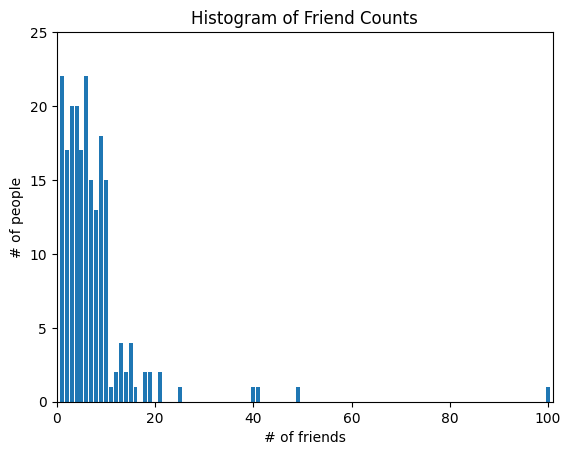

In [9]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

In [10]:
random.seed(0)

# I used trial and error to choose num_iters and step_size
# this will run for a while

learning_rate = 0.001

beta = least_squares_fit(inputs, daily_minutes_good, learning_rate,5000, 25)

print()
print("beta","\n")
print(beta)

beta[0] < 30.70 # constant
beta[1] < 1.00 # num friends
beta[2] < - 1.85 # work hours per day
beta[3] < 0.94 # has PhD

least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2545.87it/s]


beta 

[30.514795945185586, 0.9748274277323266, -1.8506912934343662, 0.9140778074476792]


True

This is the model based on the result

minutes = 30.51 + 0.975 friends - 1.85 work hours + 0.923 phd



# How to interpret the Model


### 1) What regression coefficients mean: “all else being equal”

Each coefficient tells us the effect of that variable, assuming all other variables are held fixed.

Then give a concrete example.

Suppose the model is:

$\text{minutes} = \alpha + \beta_1(\text{friends}) + \beta_2(\text{work hours}) + \beta_3(\text{PhD})$

### How to interpret coefficients?

## Friends coefficient

•	Friends coefficient = +1

•	Compare two people who are identical in every way except number of friends.

•	The one with one extra friend is predicted to spend 1 more minute per day.

## Work hours coefficient
•	Work hours coefficient = −2

•	Two people with the same friends, same education, etc.

•	The one who works one more hour spends 2 fewer minutes per day.
  
## PHD Coefficient
•	PhD coefficient = +1

•	Two people identical except PhD status.

•	The person with a PhD spends 1 extra minute per day.

Key Point:

>> When we interpret a regression coefficient, we’re not comparing random people in the whole population. We’re comparing two people who are the same in every relevant way except one variable.


## What the model does NOT capture: interactions

### Limitation.

The model assumes:

Each variable has the same effect for everyone, regardless of other variables.

But reality might be different.

Example: interaction

**Question**

“Is it reasonable that working an extra hour affects heavy social users and light social users in exactly the same way?”

Maybe:

•	If you have few friends, working more cuts into social time a lot.
•	If you have many friends, maybe you’re already very engaged and one extra hour doesn’t matter as much.

**The model cannot express:**

“The effect of work hours depends on how many friends you have.”


## How interaction terms fix this

To allow that, we add a new variable:
$(\text{friends}) \times (\text{work hours})$

Now the model becomes:
$$
\text{minutes} =
\alpha
+ \beta_1(\text{friends})
+ \beta_2(\text{work hours})
+ \beta_3(\text{friends} \times \text{work hours})$$

## Interpretation:

* $\beta_3$ tells us how the effect of work hours changes as friends increase

Note,

“The interaction term lets one variable modify the effect of another.”


## Nonlinear effects (squares, curves)

### Next limitation:
The basic model assumes effects are linear.

Example:

“Each additional friend always adds the same amount of time.”

But reality might be:

•	Friends increase engagement up to a point

•	After that, too many friends → overload → less time


# Goodness of fit

Goodness of fit answers: “How well does the model explain the variation in the data?”

$$R^2 = 1 - \frac{\text{unexplained variation}}{\text{total variation}}$$

	•	Total variation: how much the outcome varies around its mean
	•	Unexplained variation: how much is left after using the model

So:

* $R^2$ = 0: model explains nothing
* $R^2$ = 1: model explains everything

When the text says $R^2 \approx 0.68$, it means:

“About 68% of the variability in daily minutes is explained by the model.”

In [11]:
from scratch.simple_linear_regression import total_sum_of_squares

def multiple_r_squared(xs: List[Vector], ys: Vector, beta: Vector) -> float:
    sum_of_squared_errors = sum(error(x, y, beta) ** 2
                                for x, y in zip(xs, ys))
    return 1.0 - sum_of_squared_errors / total_sum_of_squares(ys)

In [12]:
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good,
                                 beta) < 0.68

In [13]:
multiple_r_squared(inputs, daily_minutes_good,
                                 beta)

0.6799849346187968

#Summary:

$R^2$ tells us how well the model fits the data, and it will always increase as we add variables. That doesn’t mean the extra variables are meaningful. To assess whether individual predictors matter, we also need standard errors of the coefficients, which tell us how certain we are about each estimated effect.

# Bootstrap

If I collected a slightly different sample of data, **how much might my median change?**

Bootstrapping is a way to simulate “slightly different samples” using only the data you already have.

Here is an example of a boostrap sample

`return [random.choice(data) for _ in data]`



This code demonstrates bootstrap resampling to measure how stable the median is under two different datasets.

# Nutshell:

Bootstrapping = simulate repeated sampling to measure uncertainty of a statistic using only the one sample you have.


In [14]:
import random

data = [1.0, 5.0, 10.0, 11.0, 3.5, 2.5, 6.6]

sample = [random.choice(data) for _ in data]
print(sample)

sample = [random.choice(data) for _ in data]
print(sample)


[3.5, 11.0, 11.0, 6.6, 6.6, 10.0, 11.0]
[10.0, 3.5, 5.0, 3.5, 5.0, 10.0, 5.0]


# Quick note about TypeVar

TypeVar makes this function generic: it can bootstrap a list of numbers, strings, or tuples. Whatever type your dataset contains is called X, and whatever your statistic returns is called Stat

In [15]:
import random
from typing import TypeVar, Callable, List
from statistics import median

X = TypeVar("X")
Stat = TypeVar("Stat")

def bootstrap_sample(data: List[X]) -> List[X]:
    """Randomly sample len(data) elements WITH replacement."""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    """Compute stats_fn on many bootstrap samples."""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

# ---- Standalone demo ----
random.seed(0)  # so you (and students) get reproducible results

data = [10.0, 20.0, 30.0, 40.0]

boot_medians = bootstrap_statistic(data, median, 20)  # 20 just to print easily

print("First 10 bootstrapped medians:", boot_medians[:10])
print("All 20 bootstrapped medians:", boot_medians)

# Optional: show a few actual bootstrap samples and their medians
print("\nA few bootstrap samples + their medians:")
for _ in range(5):
    sample = bootstrap_sample(data)
    print(sample, "median =", median(sample))

First 10 bootstrapped medians: [35.0, 40.0, 25.0, 20.0, 20.0, 35.0, 35.0, 10.0, 35.0, 20.0]
All 20 bootstrapped medians: [35.0, 40.0, 25.0, 20.0, 20.0, 35.0, 35.0, 10.0, 35.0, 20.0, 20.0, 20.0, 20.0, 30.0, 25.0, 20.0, 20.0, 15.0, 25.0, 35.0]

A few bootstrap samples + their medians:
[40.0, 30.0, 10.0, 30.0] median = 30.0
[10.0, 40.0, 30.0, 20.0] median = 25.0
[20.0, 10.0, 30.0, 10.0] median = 15.0
[20.0, 30.0, 20.0, 30.0] median = 25.0
[40.0, 10.0, 10.0, 20.0] median = 15.0


In [16]:
# note the following list comprehension is same as
[random.choice(data) for _ in range(len(data))]

[20.0, 10.0, 10.0, 10.0]

In [17]:
[random.choice(data) for _ in data]

[10.0, 20.0, 10.0, 40.0]

# Note

The following list comprehensions accomplishes the following task:

```
The following far_from_100 = ([a] +
                [b] +
                [c])
```
The second thing to notice is the `( )` is to take care of multiple lines command

```
far_from_100 = [a] + \
               [b] + \
               [c]
```



In [18]:
# far_from_100 = ([99.5 + random.random()] +
#                 [random.random() for _ in range(50)] +
#                 [200 + random.random() for _ in range(50)])
# far_from_100

In [19]:
from typing import TypeVar, Callable

X = TypeVar('X')        # Generic type for data
Stat = TypeVar('Stat')  # Generic type for "statistic"

def bootstrap_sample(data: List[X]) -> List[X]:
    """randomly samples len(data) elements with replacement"""
    return [random.choice(data) for _ in data]

def bootstrap_statistic(data: List[X],
                        stats_fn: Callable[[List[X]], Stat],
                        num_samples: int) -> List[Stat]:
    """evaluates stats_fn on num_samples bootstrap samples from data"""
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

# 101 points all very close to 100
close_to_100 = [99.5 + random.random() for _ in range(101)]

# 101 points, 50 of them near 0, 50 of them near 200
# List comprehension, creates three lists and appends them; compact code
far_from_100 = ([99.5 + random.random()] +
                [random.random() for _ in range(50)] +
                [200 + random.random() for _ in range(50)])

from scratch.statistics import median, standard_deviation

medians_close = bootstrap_statistic(close_to_100, median, 100)

medians_far = bootstrap_statistic(far_from_100, median, 100)


assert standard_deviation(medians_close) < 1
assert standard_deviation(medians_far) > 90

Bootstrapping answers: ‘If we repeated the study, how much could the median change?’ We create many fake datasets by sampling our observed data with replacement, and compute the median on each fake dataset. If the medians cluster tightly, the median is stable; if they spread out or jump around, the median is unstable. With values all near 100, bootstrapped medians stay near 100. With half the values near 0 and half near 200, small resampling imbalances push the median toward 0 or toward 200, so the bootstrap medians are wildly spread.

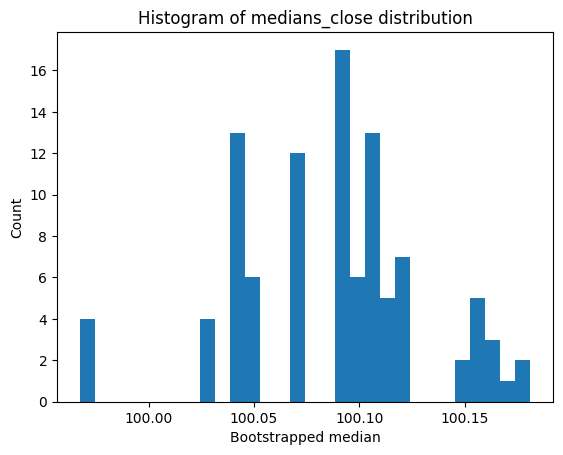

In [20]:
import matplotlib.pyplot as plt

plt.hist(medians_close, bins=30)
plt.xlabel("Bootstrapped median")
plt.ylabel("Count")
plt.title("Histogram of medians_close distribution")
plt.show()

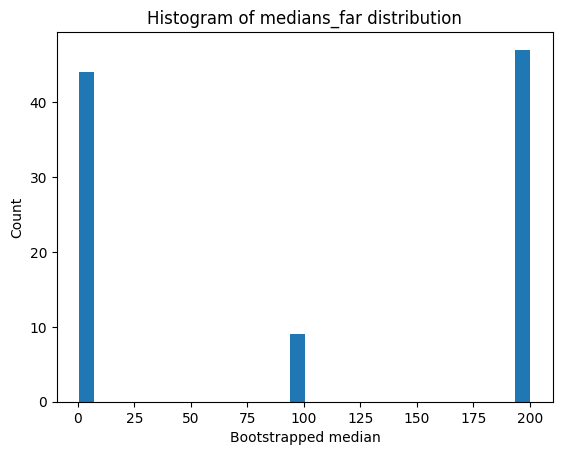

In [21]:
plt.hist(medians_far, bins=30)
plt.xlabel("Bootstrapped median")
plt.ylabel("Count")
plt.title("Histogram of medians_far distribution")
plt.show()

# Bootstrapping applied to Regression Coefficients

After fitting a regression, we have coefficient estimates $\hat\beta$.
But how confident are we in each coefficient?

That’s what standard errors of regression coefficients measure.


#Big idea

A coefficient is reliable if it stays similar across many resampled datasets; it’s unreliable if it changes a lot.

# How bootstrapping helps

We only have one dataset.
To estimate uncertainty in coefficients, we:
	1.	Resample the data (with replacement) many times (bootstrap samples)
	2.	Refit the regression on each resampled dataset
	3.	Look at how much each coefficient varies

This variation estimates the standard error of each coefficient.

Key implementation detail (important to say)

We must resample (x_i, y_i) pairs together, not separately.

Why?

	•	Each x_i must stay matched with its corresponding y_i
	•	Otherwise we destroy the relationship between inputs and output

That’s why the code zips them first:

```
list(zip(inputs, daily_minutes_good))
```

# What estimate_sample_beta does

For one bootstrap sample:

	1.	Receives a list of (x_i, y_i) pairs
	2.	Splits them back into:
	  •	x_sample
	  •	y_sample
	3.	Fits a regression
	4.	Returns the estimated coefficient vector beta

So each call produces one possible version of $\hat\beta$.

```
bootstrap_betas = bootstrap_statistic(..., estimate_sample_beta, 100)
```

This produces:

	•	100 different regression coefficient vectors. (100 different alternate realities of betas)
	•	each from a slightly different resampled dataset

# Compute SE using the following process

```
bootstrap_standard_errors = [
    standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(4)
]
```

For each coefficient $\beta_j$:

	•	collect its value across all bootstrap runs
	•	compute the standard deviation
	•	that SD ≈ standard error of $\hat\beta_j$

# Interpretation of standard error

	•	Small SE → coefficient is stable → estimate is precise
	•	Large SE → coefficient jumps around → estimate is unreliable

After calculating SEs, we carry out hypothesis testing

# Hypothesis testing with standard errors

We test:

$H_0: \beta_j = 0$ (This predictor has no linear effect on y once the other predictors are held fixed.)

$H_A: \beta_j \ne 0 $ (This predictor does have a nonzero linear effect (could be positive or negative) once others are held fixed.)

Compute a t-like statistic:
$t_j = \frac{\hat\beta_j}{\text{SE}(\hat\beta_j)}$

	•	Large magnitude → unlikely under H_0
	•	Small magnitude → could be noise

Because $n \gg k$, we approximate with the normal distribution instead of the t-distribution.

Basically,

* For each coefficient $\hat\beta_j$ estimated from our original data, we want to know how reliable it is.
* We use bootstrapping to estimate the standard error of $\hat\beta_j$, by seeing how much that coefficient varies across resampled datasets.
* Under the null hypothesis $\beta_j = 0$, the statistic
$t_j = \frac{\hat\beta_j}{\text{SE}(\hat\beta_j)}$
follows approximately a t-distribution (or a normal distribution when the sample size is large).
* We use this to perform hypothesis testing and assess whether the coefficient is likely to represent a real effect or just noise.


What the p-values tell us

From the code, we could estimate (for example):

	•	Constant term: significant
	•	num_friends: significant
	•	work_hours: significant
	•	PhD: NOT significant

In [22]:
import random
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step


In [23]:
from typing import Tuple
import datetime

def estimate_sample_beta(pairs: List[Tuple[Vector, float]]):
        x_sample = [x for x, _ in pairs]
        y_sample = [y for _, y in pairs]
        beta = least_squares_fit(x_sample, y_sample, learning_rate, 5000, 25)
        print("bootstrap sample", beta)
        return beta

random.seed(0) # so that you get the same results as me

# This will take a couple of minutes

bootstrap_betas = bootstrap_statistic(list(zip(inputs, daily_minutes_good)),
                                      estimate_sample_beta,
                                      100)

bootstrap_standard_errors = [
    standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(4)]



least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2474.18it/s]


bootstrap sample [30.49402029547431, 1.0393791030498782, -1.9516851948558498, 0.7483721251697389]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2497.79it/s]


bootstrap sample [30.149963287526045, 1.0005300432763113, -2.0650380122822547, 3.1771798548347974]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2514.07it/s]


bootstrap sample [29.202826897693726, 1.0017089956376213, -1.529424842478737, 0.9528580285760827]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1549.45it/s]


bootstrap sample [31.294812174718512, 0.9592647294941009, -1.9120875473727548, 0.039471107599515415]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2531.47it/s]


bootstrap sample [32.12414422794996, 0.8569794405277469, -1.9936770520754088, 1.0416943131372982]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1968.32it/s]


bootstrap sample [31.8691994453096, 0.7748022870492418, -2.0087625702876446, -1.2407036547656687]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2481.80it/s]


bootstrap sample [31.081197596502076, 0.9983862543869182, -1.9833984114987815, 0.9567646217580406]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2492.39it/s]


bootstrap sample [29.254530450577782, 0.9763387220017683, -1.7430339427043593, 1.9944240584590915]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1744.94it/s]


bootstrap sample [31.649174199331632, 0.9389340937491032, -1.9733848473304207, -0.15249287969349373]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2172.67it/s]


bootstrap sample [30.040109260720964, 1.0531247386421572, -1.769487856035439, 1.302971911084249]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1980.06it/s]


bootstrap sample [29.066927054721287, 1.2792640005590377, -1.9373399049478555, 0.9183668519320904]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2526.62it/s]


bootstrap sample [31.74047630333171, 0.9538879291586575, -2.0689725879612464, 1.4785830120835632]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2503.75it/s]


bootstrap sample [29.466540840626713, 0.9837739845117637, -1.9915052407093474, 3.150029950640154]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2331.75it/s]


bootstrap sample [30.975157055313737, 0.9420086669374397, -2.036767174663606, 0.6323599067111711]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1653.09it/s]


bootstrap sample [31.478778128163995, 0.8623617407485805, -1.8798782324632366, -0.11949170941208886]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2506.69it/s]


bootstrap sample [33.87286992682308, 0.8824018752321864, -1.8978803929581158, -1.0333647107478698]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2470.10it/s]


bootstrap sample [29.27220689831499, 1.0899411603739346, -1.8911943299601002, 3.162677841885803]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2535.85it/s]


bootstrap sample [30.835778095616906, 1.0242186355671825, -1.920925108122249, 1.338379513362099]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2557.05it/s]


bootstrap sample [28.211162672015906, 1.4583524403926378, -1.70241171517105, 0.9452040151872599]


least squares fit: 100%|██████████| 5000/5000 [00:05<00:00, 987.15it/s] 


bootstrap sample [29.93552336056075, 0.9470529669956465, -1.8491245571618216, 0.8573641103651929]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2186.83it/s]


bootstrap sample [30.636052325886002, 0.996617691388968, -1.8308401560119623, 0.13862673979220536]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2341.47it/s]


bootstrap sample [30.855945311129382, 0.992573130119498, -1.8348135093555478, 1.971164179774993]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1734.90it/s]


bootstrap sample [29.77226728370608, 1.0493381798575807, -1.6999309651266665, 0.922165187757515]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2480.69it/s]


bootstrap sample [28.784700358217748, 0.9629668755117147, -1.7818333154132007, 1.9051703206760755]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1568.33it/s]


bootstrap sample [31.769457992268443, 0.9040180814550004, -1.867677593282121, -0.7957987643064022]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2533.63it/s]


bootstrap sample [30.068360876258833, 0.9237365767889173, -1.7326788050658608, 1.9044381512517488]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2505.34it/s]


bootstrap sample [29.24892452277486, 1.0251706036709463, -1.6396068581125107, 1.787503950512798]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2509.40it/s]


bootstrap sample [26.16039041855174, 1.3566609275406476, -1.8807310983821035, 3.884946816272218]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2499.18it/s]


bootstrap sample [31.9708823034869, 0.871715949016825, -1.8037586194211699, -0.23788897755135488]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2103.59it/s]


bootstrap sample [30.580903591168784, 0.9610711598856189, -1.8984859248085817, -0.002318739578270305]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1784.53it/s]


bootstrap sample [31.433330253362577, 0.8768141821390378, -1.7328584033279488, -0.10210988051437443]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2509.03it/s]


bootstrap sample [30.98423686056694, 1.0361494661429191, -2.2200016449095226, 1.088674989556359]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2514.55it/s]


bootstrap sample [29.28237674477942, 1.0858388836439417, -1.7428060284747304, 1.4397328297413252]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2495.79it/s]


bootstrap sample [30.65460047430859, 0.9454408039075628, -1.7320071301269266, -0.14858621820891008]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2533.29it/s]


bootstrap sample [29.118139496835955, 0.8938088016966338, -1.9153563192896763, 2.059834581148944]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1754.45it/s]


bootstrap sample [29.954884631959384, 0.9940567914003663, -1.7605085370056381, 1.6096257131696925]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2129.09it/s]


bootstrap sample [31.00016484254486, 0.9623683159561878, -1.9115208623969566, 0.7473190835230116]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2487.11it/s]


bootstrap sample [30.82520474489788, 0.891259020802667, -1.7704690936074923, 0.7459655949536614]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2505.11it/s]


bootstrap sample [29.366136812382027, 1.012558241060829, -1.6182773155952546, 1.017025703754098]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2509.89it/s]


bootstrap sample [29.942959701435118, 1.0167217566773747, -1.5621167917565115, -0.10309047639854085]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2506.91it/s]


bootstrap sample [29.962898858207343, 1.0652251821283685, -1.9269241476635839, 2.0385736378519934]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1563.96it/s]


bootstrap sample [30.525302041791814, 0.96589441022932, -1.8870631894489636, 0.5367690208128783]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2512.50it/s]


bootstrap sample [30.678532056325906, 1.0139828545599128, -1.7817299670979696, 1.6026393229652913]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2501.00it/s]


bootstrap sample [30.09073747870904, 1.0047123547747134, -1.9560265455918167, 2.7525942961573504]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2498.40it/s]


bootstrap sample [30.937038893678917, 0.9670590611928076, -2.1124811600264293, 0.3258045605146979]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2479.94it/s]


bootstrap sample [28.78930855900357, 1.1730115746597933, -1.783513864062301, 3.262315830823608]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2330.63it/s]


bootstrap sample [31.147549123095523, 0.9326436111603988, -1.7707952504307625, -1.0993590646043099]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1660.28it/s]


bootstrap sample [31.813727613195653, 0.968378408538461, -2.019078886892217, 0.7501206686148617]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2444.09it/s]


bootstrap sample [30.223398353230184, 0.9373764744862103, -1.532360716667537, -0.014699940752100762]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2502.78it/s]


bootstrap sample [28.017775004448914, 1.0915988787946649, -1.61901910228325, 2.3971543445881216]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2492.88it/s]


bootstrap sample [29.34266888649659, 0.9815156932180105, -1.9184777914462312, 1.5482939749639464]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2513.27it/s]


bootstrap sample [32.539371666492876, 1.060883971208886, -2.2704689582768713, 0.36815976537615636]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1833.57it/s]


bootstrap sample [30.106198499206915, 0.9657134612613776, -1.719152943653064, -0.626761920722129]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2059.87it/s]


bootstrap sample [29.993282359977123, 0.9757399392816425, -1.9767875486880893, 2.048669364846275]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2500.71it/s]


bootstrap sample [30.571136409586916, 1.0664888135315582, -1.661883517774428, -0.19985556821698391]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2475.23it/s]


bootstrap sample [30.9490097252882, 0.9597396222139453, -1.9214823753987706, 1.258855034876941]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2498.26it/s]


bootstrap sample [31.887007554673076, 0.9506671496957437, -2.152653973374404, 1.6869486505999165]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2498.71it/s]


bootstrap sample [29.081704350215187, 1.0495038787355981, -1.6920009023683742, 3.6090800499492026]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1542.45it/s]


bootstrap sample [31.47954683056297, 1.1296437640969315, -1.8930013630375888, 0.232897143800955]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2492.57it/s]


bootstrap sample [30.6109739128054, 1.006589431991101, -1.8362432466801042, 0.44993972174552416]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2485.03it/s]


bootstrap sample [31.80927695488258, 0.9821469730488939, -2.007959621103926, -0.241139874505021]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2494.78it/s]


bootstrap sample [31.024210851804416, 0.9515774062029451, -1.9408222914617927, 0.6442854716394802]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2319.06it/s]


bootstrap sample [28.90814123599003, 1.055627383881031, -1.79357549913758, 2.082266951237435]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2194.40it/s]


bootstrap sample [30.025383087071763, 0.9490311032868946, -1.8905462953821095, 1.6149681025028517]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1717.10it/s]


bootstrap sample [31.344911606937217, 0.9596230552550088, -2.0849440191827746, 1.0635864768954952]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2502.00it/s]


bootstrap sample [30.887856658797634, 0.9739691303740716, -1.7504967811095185, -2.008668458011063]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2355.31it/s]


bootstrap sample [30.52417209727789, 0.9468432200060536, -1.748958321470468, -0.4294754081344007]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2481.98it/s]


bootstrap sample [33.73887281461898, 0.8342998931764719, -2.0056583070815237, -1.0048943591784747]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2509.01it/s]


bootstrap sample [29.04731144829789, 0.9737448743420717, -1.7622553843049416, 0.974487119716568]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1728.02it/s]


bootstrap sample [30.84908697552376, 1.1142041012783983, -2.055393538038613, 1.8606960468590932]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1644.28it/s]


bootstrap sample [31.20227902410509, 1.0148203879553739, -1.8311398178678528, -0.12803605188562783]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2508.35it/s]


bootstrap sample [30.449512425888518, 0.9188875408835144, -1.6623667661150154, 0.4156120951870569]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2497.82it/s]


bootstrap sample [30.937436479376498, 0.9178249912706588, -1.9178839540557806, 0.8027340312172632]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2507.04it/s]


bootstrap sample [33.0730481793411, 0.7669188362229072, -1.8621104803815114, -0.5344373694611131]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2065.18it/s]


bootstrap sample [30.980354529367382, 0.9608047189289308, -1.8571138381579289, 1.2456516010876988]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1797.45it/s]


bootstrap sample [29.890049201061156, 0.9320508621300002, -1.8151571408892877, 1.6197634219660286]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2500.62it/s]


bootstrap sample [32.74970739067421, 0.8163410438179738, -1.672793722377824, -1.627203273138947]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2477.66it/s]


bootstrap sample [32.23550207094589, 0.9915112587422378, -2.201685593411146, 0.6597215256946112]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2514.18it/s]


bootstrap sample [30.238346353105726, 0.9812068545490504, -1.9183149068660714, 2.425238910481976]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2514.48it/s]


bootstrap sample [30.574120085079137, 0.9174840515163689, -1.7918245395513424, 0.9221993996446346]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1704.14it/s]


bootstrap sample [30.20058827249059, 0.9290781608340558, -1.5128386060160501, -0.2716428116419145]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1604.63it/s]


bootstrap sample [30.568001921567827, 1.0423323558239712, -2.05393282824843, 2.070512986336468]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1654.64it/s]


bootstrap sample [32.241705940332245, 0.9289438462889386, -1.959714643247542, -0.32832700894412226]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2305.62it/s]


bootstrap sample [32.86747263095501, 1.0159010210188604, -2.0279568468137548, -0.5177147877542965]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2482.77it/s]


bootstrap sample [29.215869116992934, 1.0071212080144287, -1.956750577648415, 3.724851633646791]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1567.51it/s]


bootstrap sample [29.73162036395756, 1.0022351904608418, -1.605675006910746, 0.3836580563754841]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2508.68it/s]


bootstrap sample [32.673478414355976, 0.8824434637692977, -1.9909101579029305, 0.04871947146703188]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2466.28it/s]


bootstrap sample [29.157755537562135, 1.0683351454601346, -1.7096121511993112, 3.2616854857255335]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2165.11it/s]


bootstrap sample [30.48824056496075, 1.0353317712496077, -1.9149562223503451, 2.595089595245565]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2518.40it/s]


bootstrap sample [31.498485256154574, 0.8651737226485892, -1.9003285713857743, -0.4448014961070422]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 1684.03it/s]


bootstrap sample [28.568637146495433, 0.937708481630552, -1.669707921454888, 2.037852818692603]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2080.74it/s]


bootstrap sample [30.888089000339196, 0.9480046573855905, -1.9409732963472779, -0.38053847722698175]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2500.87it/s]


bootstrap sample [30.44930217440876, 1.1218514836785962, -1.962151679669955, 2.2443415978325145]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2507.73it/s]


bootstrap sample [30.266204204539513, 1.0068673256804963, -2.1198992898486466, 0.5362851256019148]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2496.40it/s]


bootstrap sample [29.330318126136387, 1.0424517245684064, -1.8849226826885932, 2.2650387817258584]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2488.79it/s]


bootstrap sample [31.77738953881697, 0.8928310423632744, -1.9269578522157444, 0.048635890062916735]


least squares fit: 100%|██████████| 5000/5000 [00:03<00:00, 1573.43it/s]


bootstrap sample [28.291072745509144, 1.1873361941623273, -1.854668716906258, 2.639027655808866]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2489.88it/s]


bootstrap sample [31.725525991297587, 0.8939775539447467, -1.843559060469148, -0.6224324630864074]


least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2488.00it/s]


bootstrap sample [30.2731194689144, 0.8005769229528958, -1.6991234036996576, 0.9748341305369915]


least squares fit: 100%|██████████| 5000/5000 [00:01<00:00, 2519.06it/s]

bootstrap sample [31.75696506368952, 1.0790800487199685, -2.0880894078200054, 1.642094338346172]
[1.2715078186272786, 0.10318410116073962, 0.15510591689663625, 1.2490975248051261]


In [27]:
print(bootstrap_standard_errors)

# [1.272,    # constant term, actual error = 1.19
#  0.103,    # num_friends,   actual error = 0.080
#  0.155,    # work_hours,    actual error = 0.127
#  1.249]    # phd,           actual error = 0.998

# This is what I got
# [1.2715078186272786, 0.10318410116073962,
#.                                     0.15510591689663625, 1.2490975248051261]

[1.2715078186272786, 0.10318410116073962, 0.15510591689663625, 1.2490975248051261]


In [28]:
from scratch.probability import normal_cdf

def p_value(beta_hat_j: float, sigma_hat_j: float) -> float:
  if beta_hat_j > 0:
      # if the coefficient is positive, we need to compute twice the
      # probability of seeing an even *larger* value
      return 2 * (1 - normal_cdf(beta_hat_j / sigma_hat_j))
  else:
      # otherwise twice the probability of seeing a *smaller* value
      return 2 * normal_cdf(beta_hat_j / sigma_hat_j)


In [29]:
assert p_value(30.58, 1.27)   < 0.001  # constant term
assert p_value(0.972, 0.103)  < 0.001  # num_friends
assert p_value(-1.865, 0.155) < 0.001  # work_hours
assert p_value(0.923, 1.249)  > 0.4    # phd

#Regularization (High-level overview)

	•	When we fit regression models with many variables, two problems arise:
	•	Overfitting: the model fits the training data too closely and generalizes poorly.
	•	Interpretability: many nonzero coefficients are hard to understand.
	•	Regularization addresses this by adding a penalty term to the loss function that discourages large coefficients.
	•	The model now balances:
	•	fitting the data well
	•	keeping coefficients small and simple

⸻

#Ridge Regression (L2 regularization)

	•	Adds a penalty proportional to the sum of squared coefficients (excluding the intercept).
	•	Controlled by a hyperparameter \alpha:
	•	\alpha = 0: ordinary least squares
	•	larger \alpha: stronger shrinkage of coefficients
	•	As \alpha increases:
	•	coefficients shrink toward zero
	•	model fit (R²) typically decreases
	•	Useful when predictors are correlated and when we want stability rather than sparsity.

⸻

#Lasso Regression (L1 regularization)

	•	Uses a penalty based on the sum of absolute values of coefficients.
	•	Tends to force some coefficients to be exactly zero.
	•	Produces sparse models (automatic feature selection).
	•	Not easily solved with simple gradient descent.



# Key takeaway:

Regularization trades a small loss in fit for simpler, more stable, and more interpretable models.

⸻

# Additional Reading Materials:

	•	Book: Chapter section on Regularization (ridge and lasso)
	•	GitHub: Code examples showing ridge penalties and coefficient shrinkage

In [32]:
# alpha is a *hyperparameter* controlling how harsh the penalty is
# sometimes it's called "lambda" but that already means something in Python
def ridge_penalty(beta: Vector, alpha: float) -> float:
    return alpha * dot(beta[1:], beta[1:])

def squared_error_ridge(x: Vector,
                        y: float,
                        beta: Vector,
                        alpha: float) -> float:
    """estimate error plus ridge penalty on beta"""
    return error(x, y, beta) ** 2 + ridge_penalty(beta, alpha)

from scratch.linear_algebra import add

def ridge_penalty_gradient(beta: Vector, alpha: float) -> Vector:
    """gradient of just the ridge penalty"""
    return [0.] + [2 * alpha * beta_j for beta_j in beta[1:]]

def sqerror_ridge_gradient(x: Vector,
                           y: float,
                           beta: Vector,
                           alpha: float) -> Vector:
    """
    the gradient corresponding to the ith squared error term
    including the ridge penalty
    """
    return add(sqerror_gradient(x, y, beta),
               ridge_penalty_gradient(beta, alpha))

In [33]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

learning_rate = 0.001

def least_squares_fit_ridge(xs: List[Vector],
                            ys: List[float],
                            alpha: float,
                            learning_rate: float,
                            num_steps: int,
                            batch_size: int = 1) -> Vector:
    # Start guess with mean
    guess = [random.random() for _ in xs[0]]

    for i in range(num_steps):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_ridge_gradient(x, y, guess, alpha)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

def lasso_penalty(beta, alpha):
    return alpha * sum(abs(beta_i) for beta_i in beta[1:])

In [34]:
from scratch.statistics import daily_minutes_good
from scratch.gradient_descent import gradient_step

random.seed(0)

# I used trial and error to choose niters and step_size.
# This will run for a while.

learning_rate = 0.001

beta = least_squares_fit(inputs, daily_minutes_good, learning_rate, 5000, 25)
assert 30.50 < beta[0] < 30.70  # constant
assert  0.96 < beta[1] <  1.00  # num friends
assert -1.89 < beta[2] < -1.85  # work hours per day
assert  0.91 < beta[3] <  0.94  # has PhD

assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta) < 0.68





least squares fit: 100%|██████████| 5000/5000 [00:02<00:00, 2224.88it/s]


In [ ]:
random.seed(0)
beta_0 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.0,  # alpha
                                  learning_rate, 5000, 25)
# [30.51, 0.97, -1.85, 0.91]
assert 5 < dot(beta_0[1:], beta_0[1:]) < 6
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0) < 0.69

beta_0_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 0.1,  # alpha
                                    learning_rate, 5000, 25)
# [30.8, 0.95, -1.83, 0.54]
assert 4 < dot(beta_0_1[1:], beta_0_1[1:]) < 5
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_0_1) < 0.69


beta_1 = least_squares_fit_ridge(inputs, daily_minutes_good, 1,  # alpha
                                  learning_rate, 5000, 25)
# [30.6, 0.90, -1.68, 0.10]
assert 3 < dot(beta_1[1:], beta_1[1:]) < 4
assert 0.67 < multiple_r_squared(inputs, daily_minutes_good, beta_1) < 0.69

beta_10 = least_squares_fit_ridge(inputs, daily_minutes_good,10,  # alpha
                                  learning_rate, 5000, 25)
# [28.3, 0.67, -0.90, -0.01]
assert 1 < dot(beta_10[1:], beta_10[1:]) < 2
assert 0.5 < multiple_r_squared(inputs, daily_minutes_good, beta_10) < 0.6
